# How to Calculate Precision, Recall, F1, and More for Deep Learning Models
https://machinelearningmastery.com/how-to-calculate-precision-recall-f1-and-more-for-deep-learning-models/

Train: 0.838, Test: 0.848


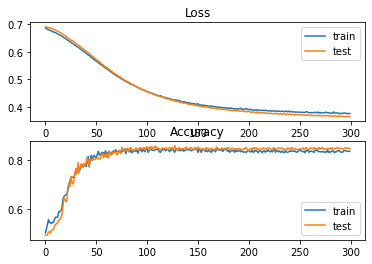

In [1]:

# multilayer perceptron model for the two circles problem
from sklearn.datasets import make_circles
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot
# generate dataset
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
# split into train and test
n_test = 500
trainX, testX = X[:n_test, :], X[n_test:, :]
trainy, testy = y[:n_test], y[n_test:]
# define model
model = Sequential()
model.add(Dense(100, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=300, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
Using Sklearn API to print and report several classification metrics

In [15]:
# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score     # Metrics with sklearn API
from sklearn.metrics import precision_score    # Metrics with sklearn API
from sklearn.metrics import recall_score       # Metrics with sklearn API
from sklearn.metrics import f1_score           # Metrics with sklearn API
from sklearn.metrics import cohen_kappa_score  # Metrics with sklearn API
from sklearn.metrics import roc_auc_score      # Metrics with sklearn API
from sklearn.metrics import confusion_matrix   # Metrics with sklearn API
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from tensorflow.keras.metrics import Precision, Recall  # Metrics with Keras API
 
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# generate and prepare the dataset
def get_data():
	# generate dataset
	X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
	# split into train and test
	n_test = 500
	trainX, testX = X[:n_test, :], X[n_test:, :]
	trainy, testy = y[:n_test], y[n_test:]
	return trainX, trainy, testX, testy
 
# define and fit the model
def get_model(trainX, trainy):
	# define model
	model = Sequential()
	model.add(Dense(100, input_dim=2, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	# fit model
	model.fit(trainX, trainy, epochs=300, verbose=0)
	return model
 
# generate data
trainX, trainy, testX, testy = get_data()
# fit model
model = get_model(trainX, trainy)
 
 
# predict probabilities for test set
yhat_probs = model.predict(testX, verbose=0)
# predict crisp classes for test set
#yhat_classes = model.predict_classes(testX, verbose=0)

# model.predict_classes() is deprecated and will be removed after 2021-01-01. 
#Please use instead:* np.argmax(model.predict(x), axis=-1), if your model does multi-class classification 
#(e.g. if it uses a softmax last-layer activation).
# Use (model.predict(x) > 0.5).astype("int32"), if your model does binary classification 
# (e.g. if it uses a sigmoid last-layer activation).


yhat_classes  = (model.predict(testX) > 0.5).astype("int32")
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]
 
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(testy, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(testy, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(testy, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(testy, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(testy, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(testy, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
print('Confusion matrix:')
matrix = confusion_matrix(testy, yhat_classes)
print(matrix)

Accuracy: 0.846000
Precision: 0.845850
Recall: 0.849206
F1 score: 0.847525
Cohens kappa: 0.691970
ROC AUC: 0.923819
Confusion matrix:
[[209  39]
 [ 38 214]]


In [ ]:
# You can also using Keras API to print and report the metrics

In [25]:
# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score     # Metrics with sklearn API
from sklearn.metrics import precision_score    # Metrics with sklearn API
from sklearn.metrics import recall_score       # Metrics with sklearn API
from sklearn.metrics import f1_score           # Metrics with sklearn API
from sklearn.metrics import cohen_kappa_score  # Metrics with sklearn API
from sklearn.metrics import roc_auc_score      # Metrics with sklearn API
from sklearn.metrics import confusion_matrix   # Metrics with sklearn API
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from tensorflow.keras.metrics import Precision, Recall  # Metrics with Keras API

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# generate and prepare the dataset
def get_data():
	# generate dataset
	X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
	# split into train and test
	n_test = 500
	trainX, testX = X[:n_test, :], X[n_test:, :]
	trainy, testy = y[:n_test], y[n_test:]
	return trainX, trainy, testX, testy
 
# define and fit the model
def get_model(trainX, trainy):
	# define model
	model = Sequential()
	model.add(Dense(100, input_dim=2, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy',Precision(),Recall()])
	# fit model
	model.fit(trainX, trainy, epochs=300, verbose=0)
	return model
 
# generate data
trainX, trainy, testX, testy = get_data()
# fit model
model = get_model(trainX, trainy)
test_loss, test_acc, test_precision, test_recall = model.evaluate(testX, testy)
print('Test Accuracy: %.2f' % (test_acc*100))
print('Precision: %f' % test_precision)
print('Recall: %f' % test_recall)


16/16 [==============================] - 0s 731us/step - loss: 0.3658 - accuracy: 0.8460 - precision_9: 0.8571 - recall_9: 0.8333
Test Accuracy: 84.60
Precision: 0.857143
Recall: 0.833333
